# **Topic 1: Conditional Probability & Bayes' Theorem (7 minutes)**

### **Essential Formulas**
```
Conditional Probability: P(A|B) = P(A ∩ B) / P(B)
Bayes' Theorem: P(A|B) = P(B|A) × P(A) / P(B)
```

### **Exercise: Email Spam Filter**
**Problem:** 
- 40% of emails are spam
- Spam detection catches 90% of actual spam
- 5% of legitimate emails are wrongly flagged as spam

**Question:** If an email is flagged as spam, what's the probability it's actually spam?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


## email spam filter
p_spam = 0.40 # P(spam) = 0.40
p_flag_given_spam = 0.90 # P(Flag|Spam) = 0.90
p_flag_given_legit = 0.05 # P(Flag |legit) = 0.05
 ## P(legit) = 1 - P(spam)
p_legit = 1 - p_spam

# P(spam|flag) = P(flag|spam) * P_spam / p_flag (BAYES)
## p_flag = P(flag intersection Spam) + P(flag intersection legit)
##        = P(flag|spam) * P(spam) + p(flag|legit) * p(legit)

p_flag = p_flag_given_spam * p_spam + p_flag_given_legit * p_legit ## Total Probability


p_spam_given_flag = p_flag_given_spam  * p_spam / p_flag

print("If an email is flagged as spam, what's the probability it's actually spam?",p_spam_given_flag)




If an email is flagged as spam, what's the probability it's actually spam? 0.9230769230769231


## **Topic 2: Gaussian (Normal) Distribution (7 minutes)**

### **Essential Formulas**
```
Normal Distribution: X ~ N(μ, σ²)
PDF: f(x) = (1/σ√2π) × e^(-½((x-μ)/σ)²)
68-95-99.7 Rule: 68% within 1σ, 95% within 2σ, 99.7% within 3σ
```

### **Exercise: Student Test Scores**
**Problem:** Math test scores follow N(75, 10²). 
- What percentage of students score between 65 and 85?
- What score represents the 90th percentile?

Students scoring 65-85 : 0.6826894921370859


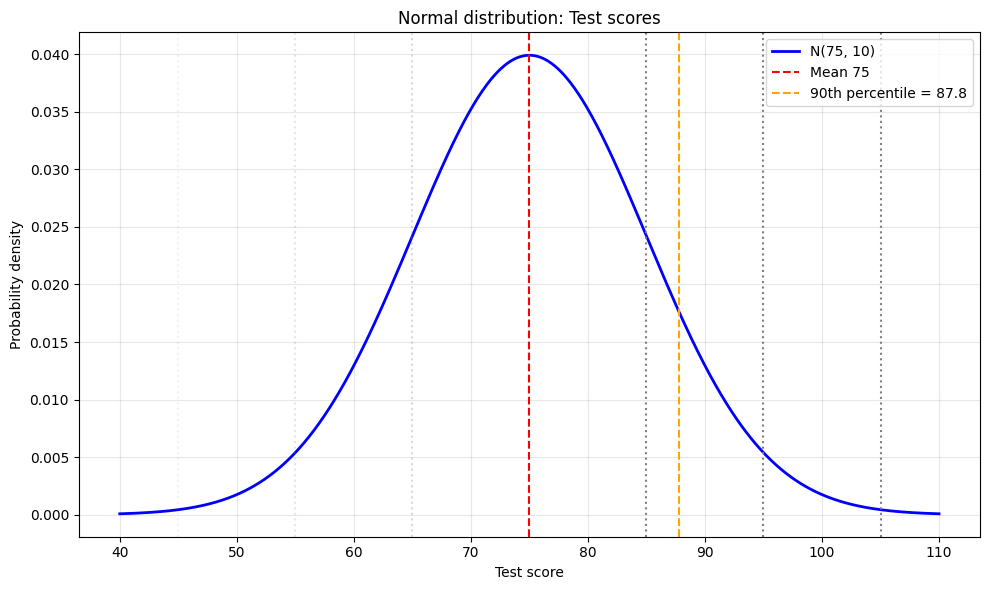

In [8]:
## normal distribution parameters

mu = 75
sigma = 10

## create the distribution
scores = np.linspace(40,110, 1000)
pdf = stats.norm.pdf(scores, mu, sigma)

## calculate the probabilities
prob_65_to_85 = stats.norm.cdf(85, mu, sigma) - stats.norm.cdf(65, mu, sigma)
percentile_90 = stats.norm.ppf(0.90, mu, sigma)
print(f"Students scoring 65-85 : {prob_65_to_85}")


#visualization

fig, ax = plt.subplots(figsize=(10,6))

# plot the normal curve

ax.plot(scores, pdf, "b-", linewidth = 2, label = f"N({mu}, {sigma})")

## shade the 65-85 region

x_fill = scores[(scores >= 65) & (scores <= 85)]
y_fill = stats.norm.pdf(x_fill, mu,sigma)

## mark some important points
ax.axvline(mu, color = "red", linestyle = "--", label = f"Mean {mu}")
ax.axvline(percentile_90, color = "orange", linestyle = "--", label = f"90th percentile = {percentile_90:.1f}")

for i, (std_mult, alpha) in enumerate([(1,0.3), (2, 0.2), (3, 0.1)]):
    ax.axvline(mu - std_mult * sigma, color = "gray", alpha = alpha, linestyle = ":")
    ax.axvline(mu + std_mult * sigma, color = "gray", linestyle = ":")

ax.set_xlabel("Test score")
ax.set_ylabel("Probability density")
ax.set_title("Normal distribution: Test scores")
ax.legend()
ax.grid(True, alpha =0.3)
plt.tight_layout()
plt.show()



## **Topic 3: Binomial, Bernoulli & Geometric (8 minutes)**

### **Essential Formulas**
```
Bernoulli: P(X = 1) = p, P(X = 0) = 1-p
Binomial: P(X = k) = C(n,k) × p^k × (1-p)^(n-k)
Geometric: P(X = k) = (1-p)^(k-1) × p  (first success on trial k)
```

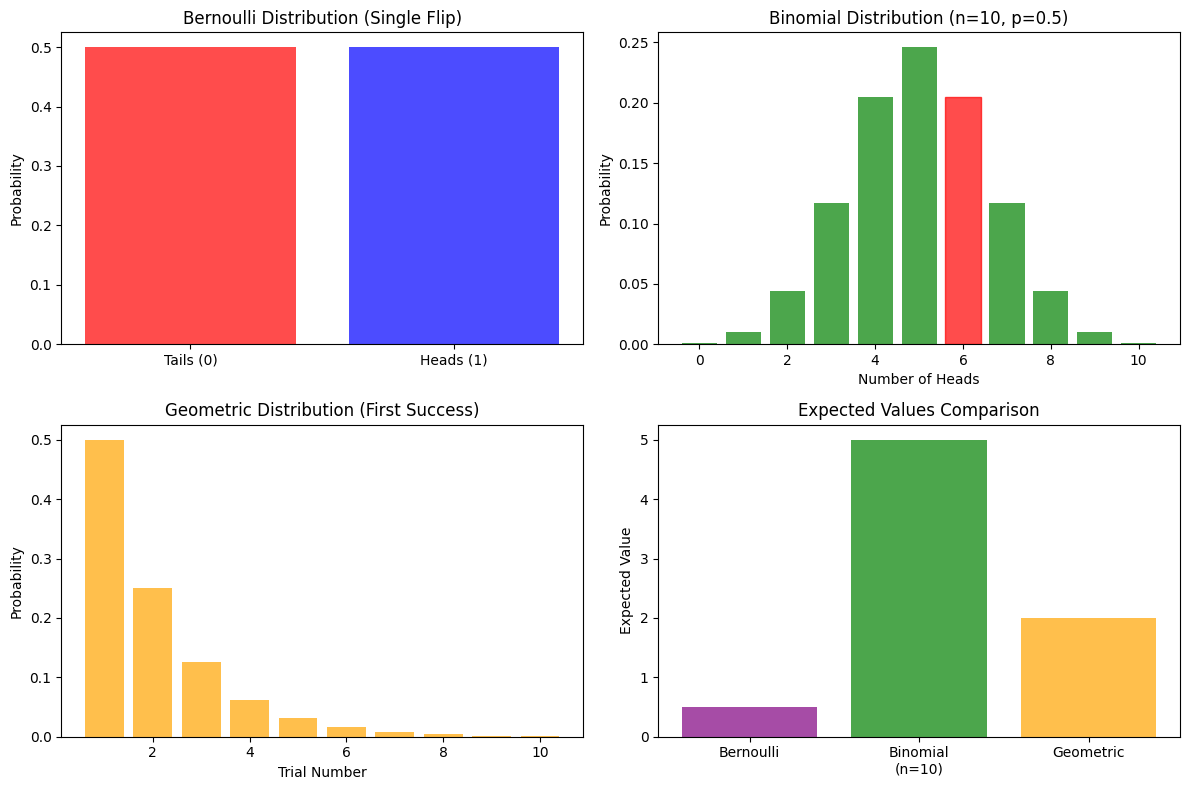

In [7]:
## Binomial flip 10 coins what is the probability of getting 6 heads??
from scipy import stats

## P(X=6) in 10 trials
n_flips = 10
p_heads = 0.5 # fair coin
k_successes = 6
# pmf(k, n, p, loc=0)
result = stats.binom.pmf(k_successes, n_flips, p_heads)
f"Probability P(X=6) is going to be {result}."
# pmf(k, p, loc=0)

## probability if getting heads first time in the 3rd trial
result_2 = stats.geom.pmf(3, p_heads)
f"Prob getting heads first time in the 3rd trial is {result_2}"

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# 1. Single Bernoulli trial
outcomes = ['Tails (0)', 'Heads (1)']
probs = [1-p_heads, p_heads]
ax1.bar(outcomes, probs, color=['red', 'blue'], alpha=0.7)
ax1.set_title('Bernoulli Distribution (Single Flip)')
ax1.set_ylabel('Probability')

# 2. Binomial distribution
k_values = np.arange(0, n_flips + 1)
binom_probs = stats.binom.pmf(k_values, n_flips, p_heads)
bars = ax2.bar(k_values, binom_probs, alpha=0.7, color='green')
bars[6].set_color('red')  # Highlight k=6
ax2.set_title(f'Binomial Distribution (n={n_flips}, p={p_heads})')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Probability')

# 3. Geometric distribution (first 10 trials)
geom_trials = np.arange(1, 11)
geom_probs = stats.geom.pmf(geom_trials, p_heads)
ax3.bar(geom_trials, geom_probs, alpha=0.7, color='orange')
ax3.set_title('Geometric Distribution (First Success)')
ax3.set_xlabel('Trial Number')
ax3.set_ylabel('Probability')

# 4. Comparison of means
distributions = ['Bernoulli', 'Binomial\n(n=10)', 'Geometric']
means = [p_heads, n_flips * p_heads, 1/p_heads]
ax4.bar(distributions, means, color=['purple', 'green', 'orange'], alpha=0.7)
ax4.set_title('Expected Values Comparison')
ax4.set_ylabel('Expected Value')

plt.tight_layout()
plt.show()

## **Topic 4: Poisson & Exponential (8 minutes)**

### **Essential Formulas**
```
Poisson: P(X = k) = (λ^k × e^(-λ)) / k!   (events in fixed time)
Exponential: f(x) = λe^(-λx)   (time between events)
Connection: If events follow Poisson(λ), time between events is Exponential(λ)
```

### **Exercise: Website Traffic Analysis**
**Problem:** A website gets 3 visitors per minute on average.
- What's the probability of exactly 5 visitors in the next minute?
- What's the probability of waiting more than 30 seconds between visitors?
